# ロジスティック回帰モデルでの分類

ロジステック回帰モデルは線形の分類アルゴリズムである。  
実装しやすく、幅広い用途で用いられている。  
しかし、線形モデルであるため、データが線形分離可能かどうか判断が必要。  
ロジスティック回帰モデルは基本的に二値分類のモデルであるが、多分類モデルに簡単に拡張できる。

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ロジスティック回帰モデルはパーセプトロンモデルと同様に各入力に対しての重みやバイアスをパラメータとして持つが、  
活性化関数がSigmoid関数である点が異なる。  
また、Sigmoid関数を用いているため、活性化関数後の出力はそれぞれの分類に当てはまる確率となることが特徴である。

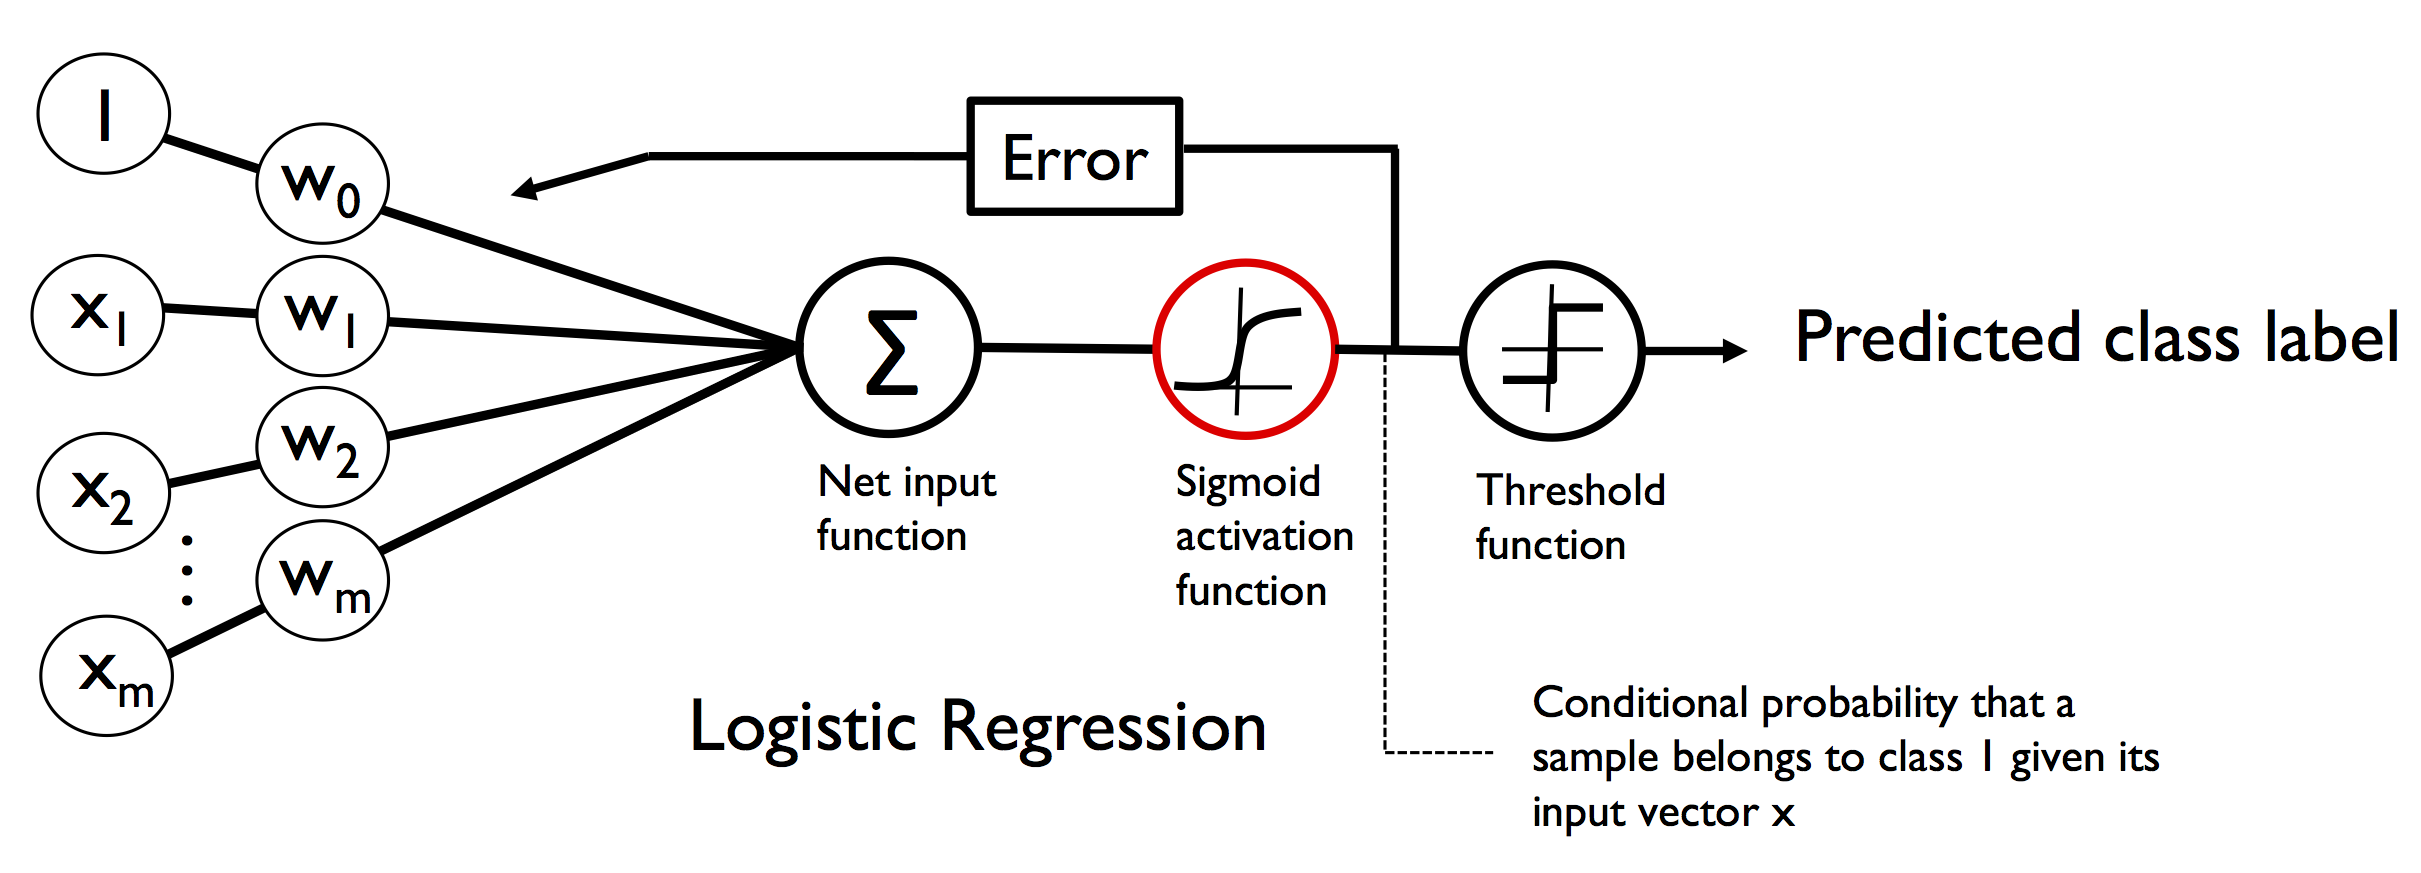

In [2]:
from IPython.display import Image
Image(filename='images/logistic_regression_model.png', width=1000) 

Sigmoid関数は下のようにZ=0, phi=0.5で点対称な関数である。

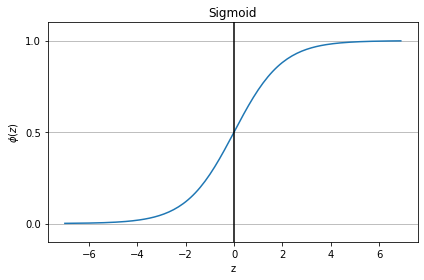

In [3]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.title('Sigmoid')
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

---------

# ロジスティック回帰モデルを用いた二値分類

今回はirisのデータセットを用いて'setosa'と'versicolor'を2値分類させることを目的とする。  
特徴量としては'sepal length (cm)', 'sepal width (cm)'のみを用いる。  

## データセットの読み込み

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
print("データセット内容の種類")
print(iris.keys())
print("特徴量の種類")
print(iris['feature_names'])
print("ラベルの種類")
print(iris.target_names)
#print("shape")
#print(iris['data'].shape)
#print("特徴量の確認")
#print(iris['data'][:5])

データセット内容の種類
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
特徴量の種類
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
ラベルの種類
['setosa' 'versicolor' 'virginica']


Xのサイズ
(100, 2)
X
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
yのサイズ
(100,)
y
[0 0 0 0 0]


Text(0, 0.5, 'sepaal width (cm)')

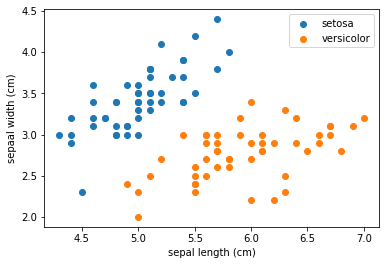

In [5]:
#目的に合うようにデータを加工する
X = iris.data[iris['target'] != 2, :] #virginica以外のデータのみを使用する
X = X[:, :2] #sepal length, sepaal widthのみを使用する
print("Xのサイズ")
print(X.shape)
print("X")
print(X[:5, :])

y = iris.target[iris['target'] != 2] #virginica以外のデータのみを使用する
print("yのサイズ")
print(y.shape)
print("y")
print(y[:5])

target_names = iris.target_names[:2] 
plt.figure()
for i, target_name in enumerate(target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepaal width (cm)')

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (75, 2)
X_test.shape :  (25, 2)
y_train.shape :  (75,)
y_test.shape :  (25,)


## ロジスティック回帰モデルの学習

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

coef
[ 2.76035667 -2.76749839]
intercept
-6.378349852524226


Text(0, 0.5, 'sepaal width (cm)')

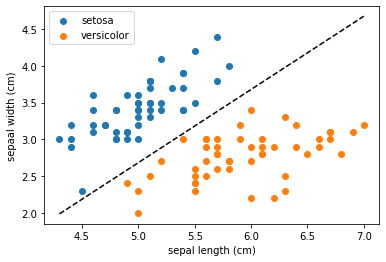

In [8]:
#境界線の計算
coef = model.coef_[0]
intercept = model.intercept_[0]
print('coef')
print(coef)
print('intercept')
print(intercept)

# 境界線は y = 0となる線分
# y = coef[0] * x1 + coef[1] * x2 + intercept = 0
# x2 = (-coef[0] * x1 - intercept) / coef[1]
x1 = np.array([4.3, 7])
x2 = (-coef[0] * x1 - intercept) / coef[1]

plt.figure()
for i, target_name in enumerate(target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=target_name)
plt.plot(x1, x2, 'k--')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepaal width (cm)')

## モデルの評価

In [9]:
model.score(X_test, y_test)

1.0

## パラメータ調整
C: 正規化パラメータ  
L2正規化の重みを調整することができる。  

C->大：  
正規化を弱くする。重みパラメータの値の大きさがある程度大きくなることを許容する。  
個々のデータを正確にクラス分類を行うようになる。  
しかし、学習データに対して過学習を起こす恐れが高くなる。  

C->小：  
正規化を強くする。重みパラメータの大きさを小さくする。  
1つ1つのデータではなく、大多数の分類を行うようになる。

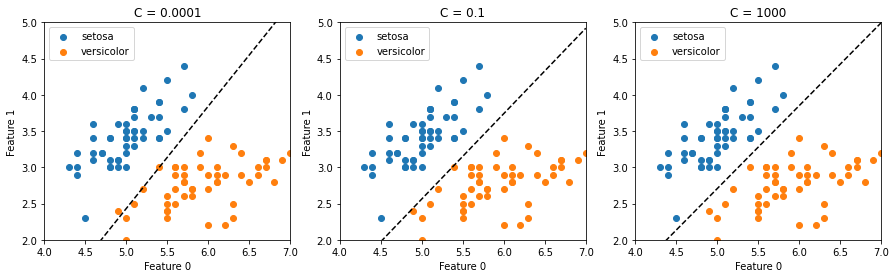

In [10]:
plt.subplots(1, 3, figsize=(15, 4))
cs = [10**(-4), 10**(-1), 10**(3)]

for i, c in enumerate(cs):
    model = LogisticRegression(C=c)
    model.fit(X, y)
    plt.subplot(1, 3, i+1)
    for i, target_name in enumerate(target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], label=target_name)
        
    coef = model.coef_[0]
    intercept = model.intercept_[0]
    # 境界線は y = 0となる線分
    # y = coef[0] * x1 + coef[1] * x2 + intercept = 0
    # x2 = (-coef[0] * x1 - intercept) / coef[1]
    x1 = np.array([4.3, 7])
    x2 = (-coef[0] * x1 - intercept) / coef[1]
    plt.plot(x1, x2, 'k--')
    plt.title("C = " + str(c))
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.xlim(4, 7)
    plt.ylim(2, 5)
    plt.legend()

Cの値を小さくすると、各重みパラメータが小さくなっていることがわかる。

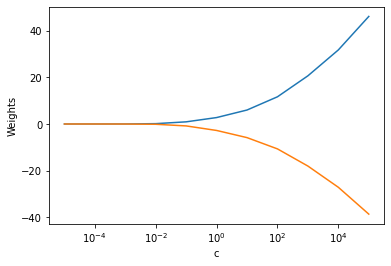

In [11]:
train_accuracy = []
test_accuracy = []
weights = []
cs = np.logspace(-5, 5, 11, base=10)

for c in cs:
    model = LogisticRegression(max_iter=1000, C=c)
    model.fit(X_train, y_train)
    weights.append(model.coef_[0])
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

plt.plot(cs, weights)
plt.ylabel("Weights")
plt.xlabel("c")
plt.xscale("log")

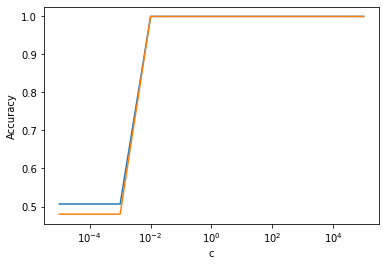

In [12]:
plt.plot(cs, train_accuracy)
plt.plot(cs, test_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("c")
plt.xscale("log")

----------

# 高次元特徴量の分類サンプル

ロジスティック回帰モデルは二値分類のモデルであるが、多値分類のモデルに拡張することができる。  
sklearnのライブラリの場合は学習データの内容から自動的に対応してくれる。

今回はirisのデータセットを用いて'setosa'と'versicolor', 'virginica'を多値分類させることを目的とする。  
特徴量としては用意されたものすべてを用いる。  

## データセットの読み込み

In [13]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

## データセットの確認

In [14]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
print('特徴量の種類')
print(iris_dataset['feature_names'])
print('\nshape')
print(iris_dataset['data'].shape)
print('\n特徴量の確認')
print(iris_dataset['data'][:5])

特徴量の種類
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

shape
(150, 4)

特徴量の確認
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [16]:
print('ラベルの種類')
print(iris_dataset['target_names'])
print('\nshape')
print(iris_dataset['target'].shape)
print('\nラベルの確認')
print(iris_dataset['target'])

ラベルの種類
['setosa' 'versicolor' 'virginica']

shape
(150,)

ラベルの確認
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
from sklearn.model_selection import train_test_split

X = iris_dataset['data']
y = iris_dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print('X_train.shape : ', X_train.shape)
print('y_train.shape : ', y_train.shape)
print('X_test.shape : ', X_test.shape)
print('y_test.shape : ', y_test.shape)

X_train.shape :  (112, 4)
y_train.shape :  (112,)
X_test.shape :  (38, 4)
y_test.shape :  (38,)


## ロジスティック回帰モデルの学習

In [18]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9821428571428571

## モデルの評価

In [19]:
model.score(X_test, y_test)

0.9736842105263158

## パラメータ調整

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
    "C": [10**(-5), 10**(-4), 10**(-3), 10**(-2), 10**(-1), 10**(0), 10**1, 10**2, 10**3, 10**4, 10**5],    
    }
]

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X, y)

print('Best parameter : ', grid_search.best_params_)
print('Best parameter score : ', grid_search.best_score_)

Best parameter :  {'C': 100}
Best parameter score :  0.9800000000000001


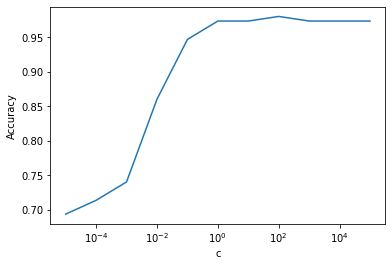

In [21]:
scores = np.array(grid_search.cv_results_['mean_test_score'])
plt.plot(param_grid[0]['C'], scores)
plt.ylabel("Accuracy")
plt.xlabel("c")
plt.xscale("log")